In [2533]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
import lightgbm as lgb
warnings.filterwarnings(action='ignore')

In [2534]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-Glass-Quality-Prediction\train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-Glass-Quality-Prediction\Test.csv')

In [2535]:
train.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [2536]:
test.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [2537]:
train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [2538]:
test.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02,5.830000e+02,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,0.385935,0.614065,136.662093,78.149228,588.096055,635.425386,1.628701e+06,1.628821e+06,2368.331046,2368.838180,0.080617,0.078902,0.210978,0.041166,0.029160
std,0.487233,0.487233,20.112588,54.858769,517.598327,491.010380,1.767507e+06,1.767550e+06,7376.877610,7376.880091,0.272481,0.269818,0.408353,0.198845,0.168398
min,0.000000,0.000000,43.000000,35.000000,1.000000,9.000000,7.438000e+03,7.414000e+03,22.000000,22.200599,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,126.000000,42.000000,60.000000,198.000000,4.947205e+05,4.957495e+05,235.000000,235.420439,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,137.000000,65.000000,484.000000,518.000000,1.168512e+06,1.169583e+06,376.000000,376.661070,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,146.000000,85.000000,1064.500000,1081.500000,2.105844e+06,2.105480e+06,1268.500000,1268.945018,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,232.000000,305.000000,1709.000000,1718.000000,1.298687e+07,1.298686e+07,152727.000000,152727.515949,1.000000,1.000000,1.000000,1.000000,1.000000


In [2539]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 16 columns):
grade_A_Component_1    1358 non-null int64
grade_A_Component_2    1358 non-null int64
max_luminosity         1358 non-null int64
thickness              1358 non-null int64
xmin                   1358 non-null int64
xmax                   1358 non-null int64
ymin                   1358 non-null int64
ymax                   1358 non-null int64
pixel_area             1358 non-null int64
log_area               1358 non-null float64
x_component_1          1358 non-null int64
x_component_2          1358 non-null int64
x_component_3          1358 non-null int64
x_component_4          1358 non-null int64
x_component_5          1358 non-null int64
class                  1358 non-null int64
dtypes: float64(1), int64(15)
memory usage: 169.8 KB


In [2540]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 15 columns):
grade_A_Component_1    583 non-null int64
grade_A_Component_2    583 non-null int64
max_luminosity         583 non-null int64
thickness              583 non-null int64
xmin                   583 non-null int64
xmax                   583 non-null int64
ymin                   583 non-null int64
ymax                   583 non-null int64
pixel_area             583 non-null int64
log_area               583 non-null float64
x_component_1          583 non-null int64
x_component_2          583 non-null int64
x_component_3          583 non-null int64
x_component_4          583 non-null int64
x_component_5          583 non-null int64
dtypes: float64(1), int64(14)
memory usage: 68.4 KB


In [2541]:
train.shape , test.shape

((1358, 16), (583, 15))

In [2542]:
train.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5'])['class'].value_counts()

x_component_1  x_component_2  x_component_3  x_component_4  x_component_5  class
0              0              0              0              0              2        471
                                                                           1        278
                                                            1              1         38
                                             1              0              1         48
                              1              0              0              1        268
               1              0              0              0              1        144
1              0              0              0              0              1        111
Name: class, dtype: int64

In [2543]:
train= train.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5']).get_group((0,0,0,0,0)).reset_index(drop = True)

In [2545]:
ind_1 = []
ind_1.extend(test[test.x_component_1==1].index.tolist())
ind_1.extend(test[test.x_component_2==1].index.tolist())
ind_1.extend(test[test.x_component_3==1].index.tolist())
ind_1.extend(test[test.x_component_4==1].index.tolist())
ind_1.extend(test[test.x_component_5==1].index.tolist())
len(ind_1)

257

In [2546]:
test = test.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5']).get_group((0,0,0,0,0))

In [2547]:
len(test)

326

# WORK

In [2548]:
train.groupby(['grade_A_Component_1','grade_A_Component_2'])['class'].value_counts()

grade_A_Component_1  grade_A_Component_2  class
0                    1                    2        285
                                          1         85
1                    0                    1        193
                                          2        186
Name: class, dtype: int64

# Max

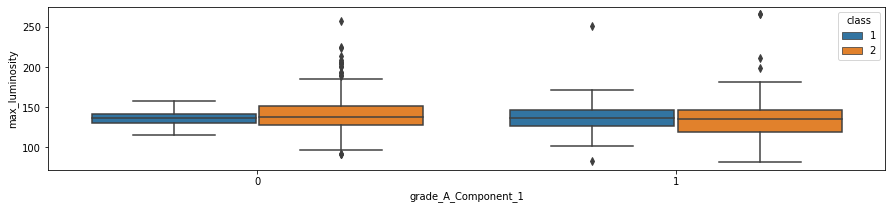

In [2549]:
plt.figure(figsize=(15,3))
sns.boxplot(data=train,x='grade_A_Component_1',y='max_luminosity',hue='class')

# Thickness

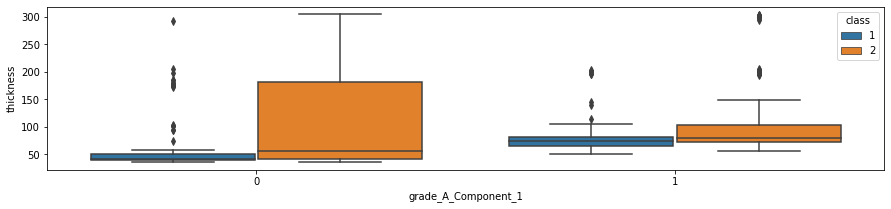

In [2551]:
plt.figure(figsize=(15,3))
sns.boxplot(data=train,x='grade_A_Component_1',y='thickness',hue='class')

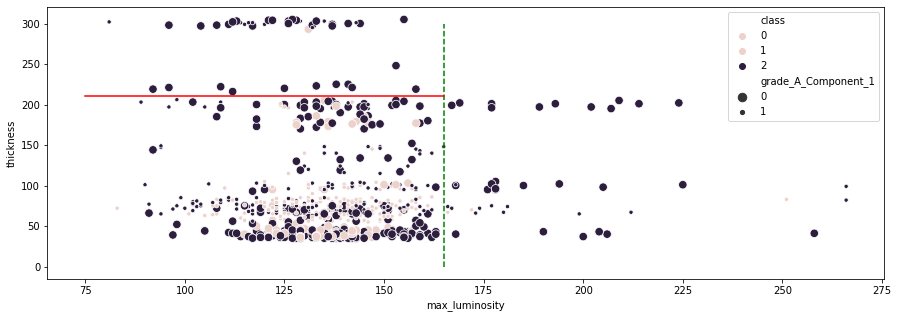

In [2552]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='max_luminosity',y='thickness',hue='class',size='grade_A_Component_1')
plt.plot([165,165],[0,300], 'g--')
plt.plot([75,165],[210,210], 'r-')

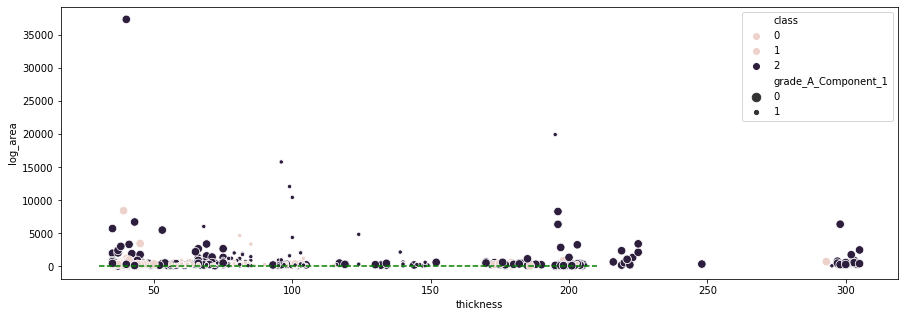

In [2553]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=train['thickness'],y=(train['log_area']),hue=train['class'],size=train['grade_A_Component_1'])
plt.plot([30,210],[7.4,7.4], 'g--')
plt.plot([210,210],[4,10], 'r-')

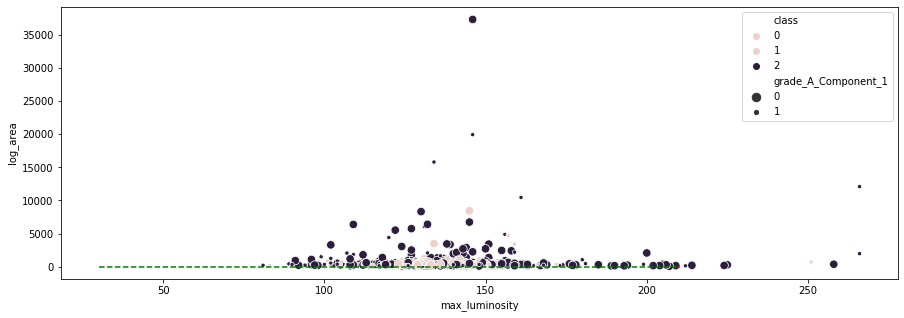

In [2554]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=train['max_luminosity'],y=(train['log_area']),hue=train['class'],size=train['grade_A_Component_1'])
plt.plot([30,210],[7.4,7.4], 'g--')
plt.plot([210,210],[4,10], 'r-')

In [2555]:
train.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
1,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2
2,0,1,136,42,348,361,7202710,7202537,264,264.243269,0,0,0,0,0,1
3,0,1,135,36,806,831,299775,301108,264,264.389126,0,0,0,0,0,2
4,1,0,130,75,1635,1647,2115008,2115955,368,368.980284,0,0,0,0,0,1


In [2556]:
#train.log_area = np.log1p(train['log_area'])
#test.log_area = np.log1p(test['log_area'])

In [2557]:
train.shape, test.shape

((749, 16), (326, 15))

In [2558]:
ind_2 = []
ind_2.extend(train[train.max_luminosity>165].index.tolist())
ind_2.extend(train[train.thickness>210].index.tolist())
#ind_2.extend(train[train.log_area>7.4].index.tolist())
train.drop(index = set(ind_2), inplace = True)
train.reset_index(drop = True, inplace = True)
len(ind_2)

86

In [2560]:
ind_2 = []
ind_2.extend(test[test.max_luminosity>165].index.tolist())
ind_2.extend(test[test.thickness>210].index.tolist())
#ind_2.extend(test[test.log_area>7.4].index.tolist())
test.drop(index = set(ind_2), inplace = True)
len(set(ind_2))
ind_2 = set(ind_2)

In [2561]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 1 to 578
Data columns (total 15 columns):
grade_A_Component_1    296 non-null int64
grade_A_Component_2    296 non-null int64
max_luminosity         296 non-null int64
thickness              296 non-null int64
xmin                   296 non-null int64
xmax                   296 non-null int64
ymin                   296 non-null int64
ymax                   296 non-null int64
pixel_area             296 non-null int64
log_area               296 non-null float64
x_component_1          296 non-null int64
x_component_2          296 non-null int64
x_component_3          296 non-null int64
x_component_4          296 non-null int64
x_component_5          296 non-null int64
dtypes: float64(1), int64(14)
memory usage: 37.0 KB


In [2563]:
len(ind_1), len(ind_2)

(257, 30)

In [2564]:
326-43

283

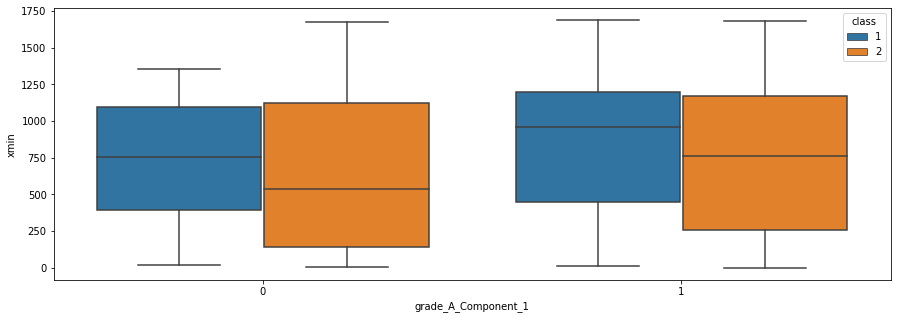

In [2565]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train,x='grade_A_Component_1', y='xmin',hue='class')

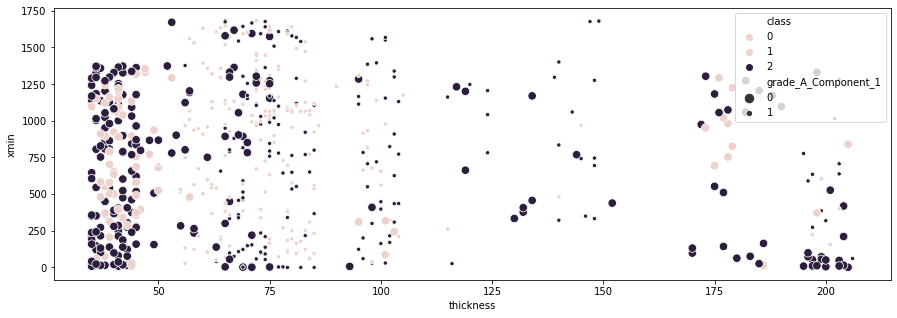

In [2566]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='xmin',hue='class',size='grade_A_Component_1')

xmax

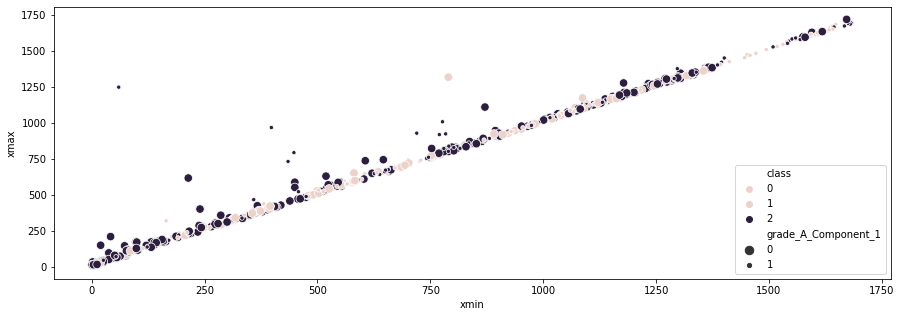

In [2567]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='xmin',y='xmax',hue='class',size='grade_A_Component_1')

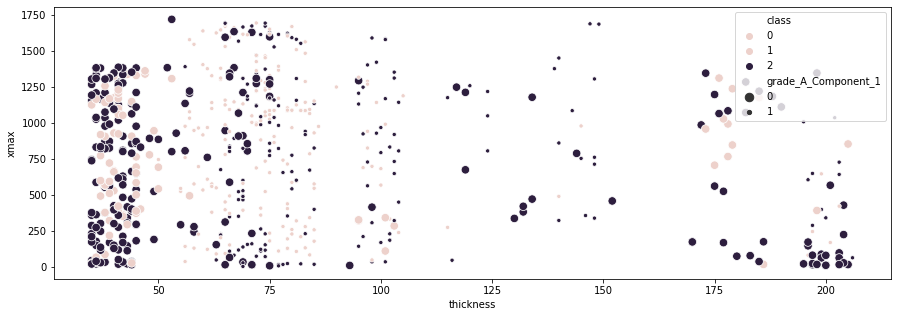

In [2568]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='xmax',hue='class',size='grade_A_Component_1')

# YMAXMIN

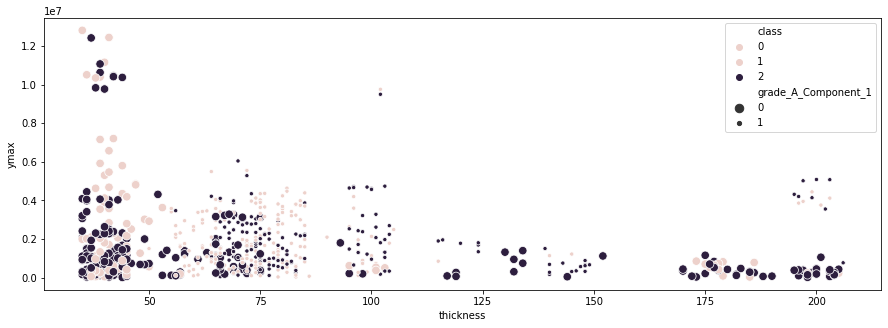

In [2569]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='ymax',hue='class',size='grade_A_Component_1')

In [2570]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2


# Pixel area

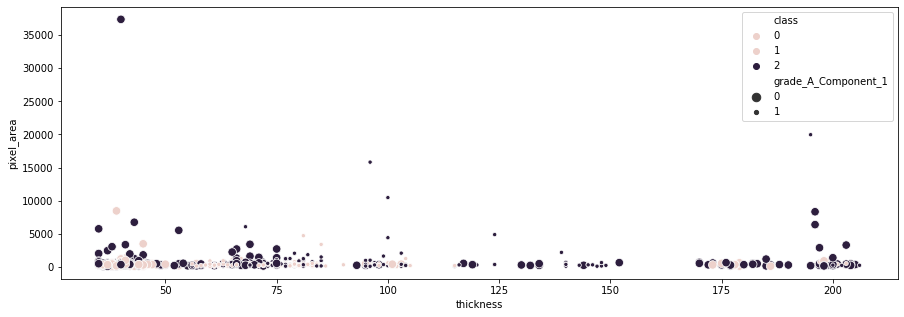

In [2571]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='pixel_area',hue='class',size='grade_A_Component_1')

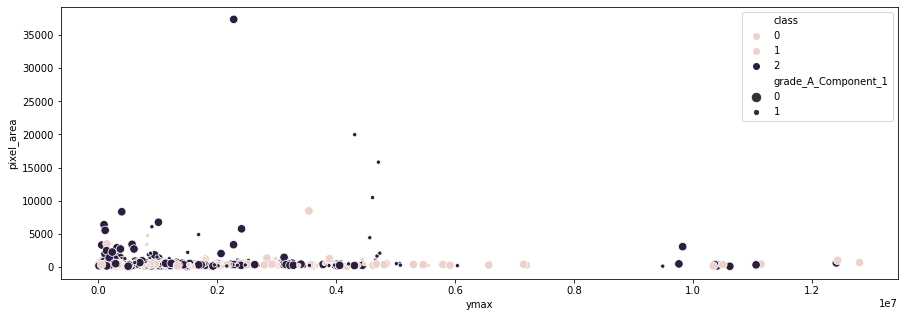

In [2572]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='ymax',y='pixel_area',hue='class',size='grade_A_Component_1')

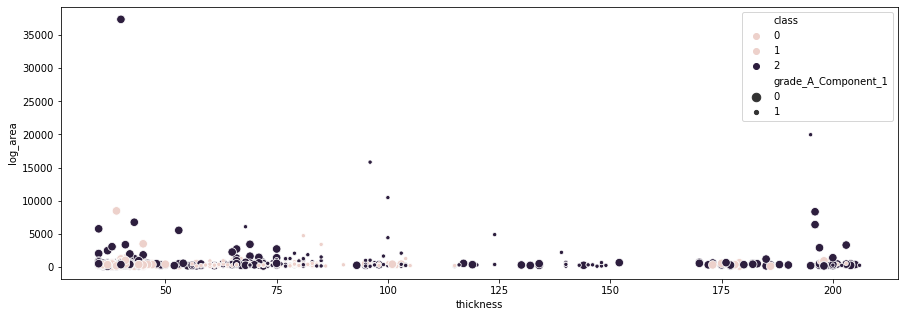

In [2573]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='log_area',hue='class',size='grade_A_Component_1')

# Main

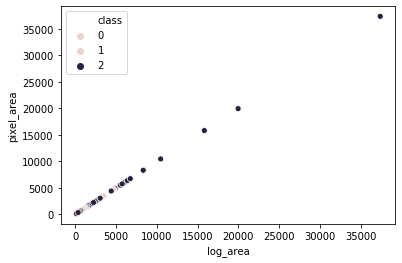

In [2574]:
sns.scatterplot(data = train , x='log_area' , y='pixel_area' , hue = 'class')

In [2575]:
train['y_diff'] = train['ymax'] - train['ymin']
train['x_diff'] = train['xmax'] - train['xmin']
#train['diff_area'] = train['log_area'] - train['pixel_area']
train['area'] = train.y_diff * train.x_diff

test['y_diff'] = test['ymax'] - test['ymin']
test['x_diff'] = test['xmax'] - test['xmin']
#test['diff_area'] = test['log_area'] - test['pixel_area']
test['area'] = test.y_diff * test.x_diff

train.drop(columns = ['grade_A_Component_2', 'x_component_1','x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)
test.drop(columns = ['grade_A_Component_2', 'x_component_1','x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)
#test.drop(columns = ['grade_A_Component_2','x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)

In [2576]:
train.head(1)

,grade_A_Component_1,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,class,y_diff,x_diff,area
0,1,135,65,950,974,1038442,1036754,300.120598,2,-1688,24,-40512


In [2577]:
test.head(1)

,grade_A_Component_1,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,y_diff,x_diff,area
1,0,158,99,125,132,189874,189529,421.928609,-345,7,-2415


In [2578]:
label = train['class']
del train['class']
label = label.astype('int')

In [2579]:
train.shape, label.shape, test.shape

((663, 11), (663,), (296, 11))

In [2580]:
train.head()

,grade_A_Component_1,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,y_diff,x_diff,area
0,1,135,65,950,974,1038442,1036754,300.120598,-1688,24,-40512
1,1,138,69,462,466,1088124,1086579,251.401943,-1545,4,-6180
2,0,136,42,348,361,7202710,7202537,264.243269,-173,13,-2249
3,0,135,36,806,831,299775,301108,264.389126,1333,25,33325
4,1,130,75,1635,1647,2115008,2115955,368.980284,947,12,11364


mm = MinMaxScaler()
train = pd.DataFrame(mm.fit_transform(train), columns = train.columns)
test = pd.DataFrame(mm.fit_transform(test), columns = test.columns)

# ML

In [2581]:
train.shape, label.shape, test.shape

((663, 11), (663,), (296, 11))

In [2583]:
prediction =[]
def kfold(model,train,label, test, Random_state):
    strat = StratifiedShuffleSplit(n_splits=5, random_state=Random_state)
    
    for tr_index, val_index in (strat.split(train,label)):
            x_train, x_val  = train.loc[tr_index,:],train.loc[val_index,:]
            y_train, y_val = label[tr_index], label[val_index]
            
            model.fit(x_train, y_train)
            tr_pred = model.predict_proba(x_train)
            val_pred = model.predict_proba(x_val)
            
            print('Training Loss : {},   Validation Loss : {}'.format(log_loss(y_train, tr_pred), log_loss(y_val, val_pred)))
          #  print('Training Loss : {},   Validation Loss : {})'.format(accuracy_score(tr_pred, y_train), accuracy_score(val_pred, y_val)))
          #  print('Training Loss : {},   Validation Loss : {})'.format(classification_report(tr_pred, y_train), classification_report(val_pred, y_val)))
    
    return(model.predict_proba(test))

In [2584]:
pred = kfold(GradientBoostingClassifier(random_state=911802),train,label,test,2725)

Training Loss : 0.302080496665182,   Validation Loss : 0.649720772705364
Training Loss : 0.31151395251869446,   Validation Loss : 0.5305638665780028
Training Loss : 0.3061249490874915,   Validation Loss : 0.5602435190054575
Training Loss : 0.31008937654206425,   Validation Loss : 0.5104873303767801
Training Loss : 0.3259121172719093,   Validation Loss : 0.4617845851206096


In [2585]:
kfold(SVC(probability=True), train, label,test,32123)

Training Loss : 0.6593064603390302,   Validation Loss : 0.6708194979693587
Training Loss : 0.6635864311869303,   Validation Loss : 0.6424526811079899
Training Loss : 0.6623897893426127,   Validation Loss : 0.6490447673923031
Training Loss : 0.6651049887722426,   Validation Loss : 0.639228200290572
Training Loss : 0.6645804757823138,   Validation Loss : 0.6461251642446251


array([[0.37534682, 0.62465318],
       [0.5932224 , 0.4067776 ],
       [0.37444898, 0.62555102],
       [0.37696043, 0.62303957],
       [0.37516721, 0.62483279],
       [0.46333424, 0.53666576],
       [0.37539248, 0.62460752],
       [0.38078905, 0.61921095],
       [0.3746851 , 0.6253149 ],
       [0.42220903, 0.57779097],
       [0.37447782, 0.62552218],
       [0.37562205, 0.62437795],
       [0.37448336, 0.62551664],
       [0.37573687, 0.62426313],
       [0.37465066, 0.62534934],
       [0.37551958, 0.62448042],
       [0.53846928, 0.46153072],
       [0.39420457, 0.60579543],
       [0.59298969, 0.40701031],
       [0.37569285, 0.62430715],
       [0.43790082, 0.56209918],
       [0.37577472, 0.62422528],
       [0.37535751, 0.62464249],
       [0.37487521, 0.62512479],
       [0.37470918, 0.62529082],
       [0.37479845, 0.62520155],
       [0.37526706, 0.62473294],
       [0.37588052, 0.62411948],
       [0.39884149, 0.60115851],
       [0.5       , 0.5       ],
       [0.

In [2587]:
pred = kfold(RandomForestClassifier(random_state=123123),train,label,test,31235889)

Training Loss : 0.15179858258326817,   Validation Loss : 0.628392680487018
Training Loss : 0.15678325030859241,   Validation Loss : 0.47162460199135603
Training Loss : 0.15310646054449797,   Validation Loss : 0.6404241817590015
Training Loss : 0.1524158666944195,   Validation Loss : 0.5836738559973452
Training Loss : 0.1564667633451474,   Validation Loss : 0.5584905981834543


In [2475]:
kfold(lgb.LGBMClassifier(class_weight='balanced'),train,label,test,10909)

Training Loss : 0.08222140015306427,   Validation Loss : 0.5970175251467951
Training Loss : 0.0676736319576995,   Validation Loss : 1.1638900615196865
Training Loss : 0.07873034141549527,   Validation Loss : 0.6363117816182486
Training Loss : 0.07855879230186742,   Validation Loss : 0.6233188041992308
Training Loss : 0.07996211688924229,   Validation Loss : 0.5603922704861287


array([[0.02061454, 0.97938546],
       [0.38055227, 0.61944773],
       [0.04665768, 0.95334232],
       [0.01471788, 0.98528212],
       [0.1698826 , 0.8301174 ],
       [0.06164599, 0.93835401],
       [0.00926945, 0.99073055],
       [0.57852085, 0.42147915],
       [0.19541642, 0.80458358],
       [0.25351274, 0.74648726],
       [0.85638554, 0.14361446],
       [0.3187101 , 0.6812899 ],
       [0.43162869, 0.56837131],
       [0.03822418, 0.96177582],
       [0.26735405, 0.73264595],
       [0.04468399, 0.95531601],
       [0.4300771 , 0.5699229 ],
       [0.24545785, 0.75454215],
       [0.46136778, 0.53863222],
       [0.02635455, 0.97364545],
       [0.32483931, 0.67516069],
       [0.11035813, 0.88964187],
       [0.25656012, 0.74343988],
       [0.67794594, 0.32205406],
       [0.09624671, 0.90375329],
       [0.74946581, 0.25053419],
       [0.27152177, 0.72847823],
       [0.56422867, 0.43577133],
       [0.42352669, 0.57647331],
       [0.14205957, 0.85794043],
       [0.

In [2476]:
kfold(LogisticRegression(class_weight='balanced'),train,label,test,10909)

Training Loss : 0.6243480533736933,   Validation Loss : 0.6396372050103402
Training Loss : 0.6122170161688304,   Validation Loss : 0.7353118442396369
Training Loss : 0.6284537726929187,   Validation Loss : 0.5914773249324103
Training Loss : 0.6240526507605988,   Validation Loss : 0.6330641445209436
Training Loss : 0.6229235037826882,   Validation Loss : 0.64199471488815


array([[0.29222999, 0.70777001],
       [0.70186306, 0.29813694],
       [0.17887148, 0.82112852],
       [0.25454813, 0.74545187],
       [0.37238152, 0.62761848],
       [0.68344905, 0.31655095],
       [0.25502339, 0.74497661],
       [0.71775663, 0.28224337],
       [0.60837838, 0.39162162],
       [0.6620786 , 0.3379214 ],
       [0.66599937, 0.33400063],
       [0.38243497, 0.61756503],
       [0.38591374, 0.61408626],
       [0.3548957 , 0.6451043 ],
       [0.46172584, 0.53827416],
       [0.44388629, 0.55611371],
       [0.48594676, 0.51405324],
       [0.61889705, 0.38110295],
       [0.52981229, 0.47018771],
       [0.17246394, 0.82753606],
       [0.73087183, 0.26912817],
       [0.52459598, 0.47540402],
       [0.40857903, 0.59142097],
       [0.66351104, 0.33648896],
       [0.38769079, 0.61230921],
       [0.65734341, 0.34265659],
       [0.56400445, 0.43599555],
       [0.62301855, 0.37698145],
       [0.65109916, 0.34890084],
       [0.70087827, 0.29912173],
       [0.

In [2495]:
import xgboost as xgb
pred = kfold(xgb.XGBClassifier(random_state=123123),train,label,test,312312)

Training Loss : 0.3727149678003273,   Validation Loss : 0.5374060180329252
Training Loss : 0.3497952532090536,   Validation Loss : 0.7383342629182152
Training Loss : 0.36434317261269694,   Validation Loss : 0.5791442143381573
Training Loss : 0.3751476478304655,   Validation Loss : 0.5649016318493523
Training Loss : 0.36515454292244803,   Validation Loss : 0.669734164926922


In [2588]:
final = pd.DataFrame(pred, index=test.index, columns = [1,2])

In [2589]:
final.head()

,1,2
1,0.23,0.77
4,0.37,0.63
9,0.27,0.73
10,0.24,0.76
12,0.20,0.80


In [2590]:
len(ind_2),len(ind_1)

(30, 257)

In [2591]:
df_1 = pd.DataFrame({1:[1.0 for i in range(1,258)],   2:[0.0 for i in range(1,258)]}, index=ind_1).sort_index()
df_2 = pd.DataFrame({1:[0.0 for i in range(1,31)],   2:[1.0 for i in range(1,31)]}, index=ind_2).sort_index()

In [2592]:
answer = pd.concat([final, df_1, df_2]).sort_index()

In [2593]:
answer.head(20)

,1,2
0,1.00,0.00
1,0.23,0.77
2,1.00,0.00
3,1.00,0.00
4,0.37,0.63
5,1.00,0.00
6,1.00,0.00
7,1.00,0.00
8,1.00,0.00
9,0.27,0.73


In [2594]:
answer.to_excel('groupby_only_lum_thick_rf.xlsx', index = False)

In [2595]:
answer.shape

(583, 2)

In [2596]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 582
Data columns (total 2 columns):
1    583 non-null float64
2    583 non-null float64
dtypes: float64(2)
memory usage: 13.7 KB
